In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.precision", 2)

# Creating model object and indicating path
data_path = "../../../../../input/BES/dionisos/dionisos_horizons/gempy_format/teste_2/"
geo_model = gp.create_model("Dionisos-BES-Horizons-v1")

No module named 'osgeo'


### Detalhes dos dados
- Contém os horizontes 1, 2, 25 e 27 gerado do dionisos e convertido para .csv
- Todos os horizontes foram reduzidos em X e Y para diminuir a quantidade de pontos (1000)
- Cada horizonte (surface no GemPy) é uma série
- Ponto de orientação gerado com KNN pelo GemPy (Quando salvar a orientação gerada, precisa trocar o header surfaces para formation, se for abrir o .csv ao invés de rodar sempre o KNN)

## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 175000, 0, 150000, -15000, 0],
    resolution=[50, 50, 50],
    path_i=data_path + "surface_points_horizons.csv",
    #path_o=data_path + "orientations_points.csv",
)

Active grids: ['regular']


Dionisos-BES-Horizons-v1  2024-03-25 11:10

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,Horizon_1,Default series,1,#015482,1
1,Horizon_2,Default series,2,#9f0052,2
2,Horizon_15,Default series,3,#ffbe00,3
3,Horizon_27,Default series,4,#728f02,4
4,basement,Basement,1,#443988,5


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series_1": ("Horizon_1",),
        "Strat_Series_2": ("Horizon_2",),
        "Strat_Series_3": ("Horizon_15",),
        "Strat_Series_4": ("Horizon_27",),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,Horizon_1,Strat_Series_1,1,#015482,1
1,Horizon_2,Strat_Series_2,1,#9f0052,2
2,Horizon_15,Strat_Series_3,1,#ffbe00,3
3,Horizon_27,Strat_Series_4,1,#728f02,4
4,basement,Basement_series,1,#443988,5


In [5]:
geo_model.series

,order_series,BottomRelation,isActive,isFault,isFinite
Strat_Series_1,1,Erosion,False,False,False
Strat_Series_2,2,Erosion,False,False,False
Strat_Series_3,3,Erosion,False,False,False
Strat_Series_4,4,Erosion,False,False,False
Basement_series,5,Erosion,False,False,False


In [6]:
geo_model.get_data()

X         Y       Z    smooth     surface  G_x   
surface_points 0           0.0       0.0 -1503.0  2.00e-06   Horizon_1  NaN  \
               1        5000.0       0.0 -1574.0  2.00e-06   Horizon_1  NaN   
               2        5000.0       0.0 -1574.0  2.00e-06   Horizon_1  NaN   
               3       10000.0       0.0 -1645.0  2.00e-06   Horizon_1  NaN   
               4       10000.0       0.0 -1645.0  2.00e-06   Horizon_1  NaN   
...                        ...       ...     ...       ...         ...  ...   
               16795  165000.0  150000.0 -8849.0  2.00e-06  Horizon_27  NaN   
               16796  165000.0  150000.0 -8849.0  2.00e-06  Horizon_27  NaN   
               16797  170000.0  150000.0 -8979.0  2.00e-06  Horizon_27  NaN   
               16798  170000.0  150000.0 -8979.0  2.00e-06  Horizon_27  NaN   
               16799  175000.0  150000.0 -9002.0  2.00e-06  Horizon_27  NaN   

                      G_y  G_z  
surface_points 0      NaN  NaN  
               1      NaN  NaN  
               2      NaN  NaN  
               3      NaN  NaN  
               4      NaN  NaN  
...                   ...  ...  
               16795  NaN  NaN  
               16796  NaN  NaN  
               16797  NaN  NaN  
               16798  NaN  NaN  
               16799  NaN  NaN  

[16800 rows x 8 columns]

In [7]:
neighbours = gp.select_nearest_surfaces_points(geo_model, geo_model.surface_points.df, 10)
opoints = gp.set_orientation_from_neighbours_all(geo_model, neighbours)

In [8]:
geo_model.get_data()

X         Y       Z    smooth     surface   
surface_points 0           0.0       0.0 -1503.0  2.00e-06   Horizon_1  \
               1        5000.0       0.0 -1574.0  2.00e-06   Horizon_1   
               2        5000.0       0.0 -1574.0  2.00e-06   Horizon_1   
               3       10000.0       0.0 -1645.0  2.00e-06   Horizon_1   
               4       10000.0       0.0 -1645.0  2.00e-06   Horizon_1   
...                        ...       ...     ...       ...         ...   
orientations   16795  165000.0  150000.0 -8849.0  1.00e-02  Horizon_27   
               16796  165000.0  150000.0 -8849.0  1.00e-02  Horizon_27   
               16797  170000.0  150000.0 -8979.0  1.00e-02  Horizon_27   
               16798  170000.0  150000.0 -8979.0  1.00e-02  Horizon_27   
               16799  175000.0  150000.0 -9002.0  1.00e-02  Horizon_27   

                           G_x   G_y  G_z  
surface_points 0           NaN   NaN  NaN  
               1           NaN   NaN  NaN  
               2           NaN   NaN  NaN  
               3           NaN   NaN  NaN  
               4           NaN   NaN  NaN  
...                        ...   ...  ...  
orientations   16795 -5.65e-03 -0.05  1.0  
               16796 -5.65e-03 -0.05  1.0  
               16797  1.80e-02 -0.07  1.0  
               16798  1.80e-02 -0.07  1.0  
               16799  1.29e-02 -0.06  1.0  

[33600 rows x 8 columns]

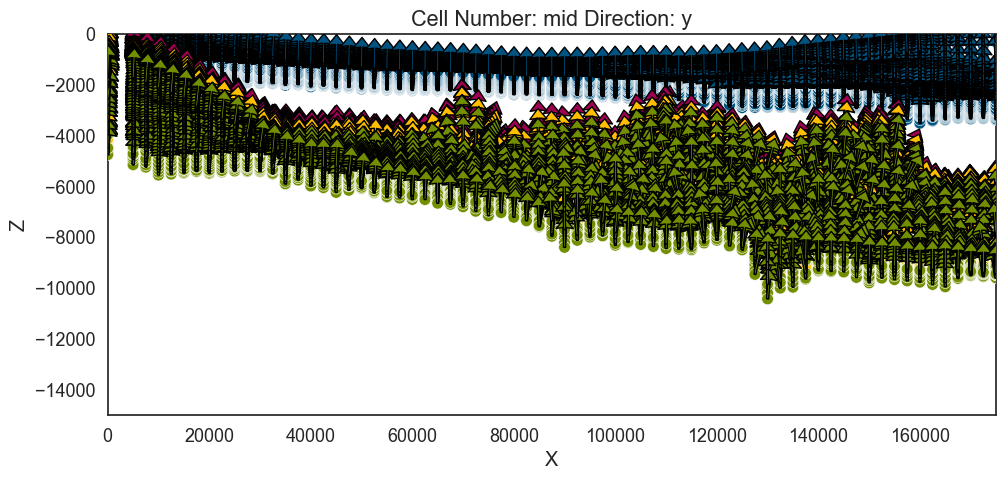

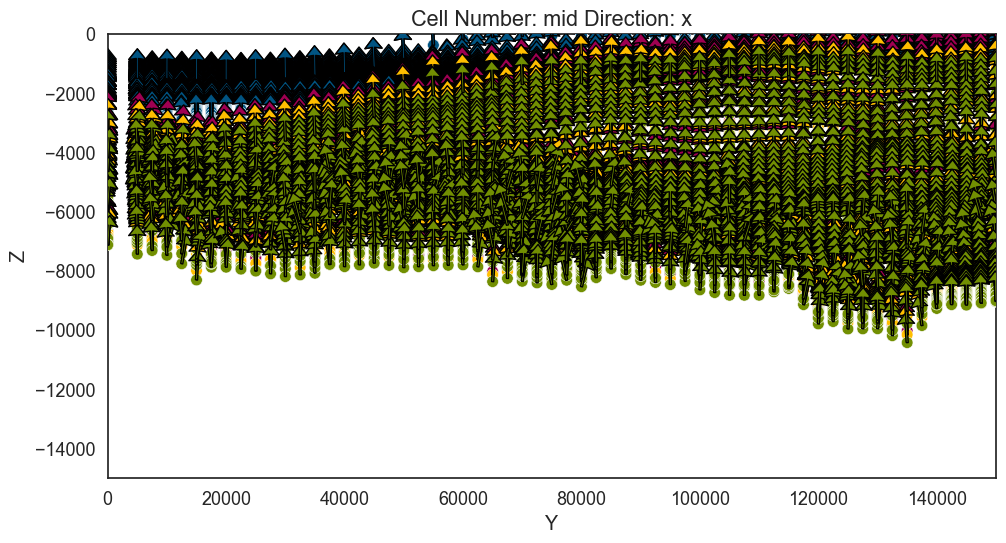

In [11]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=5, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=5, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [12]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="background",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=5,
)

In [13]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                           values
range                  230976.19
$C_o$              1270238095.24
drift equations  [3, 3, 3, 3, 3]
CPU times: total: 18.3 s
Wall time: 19 s


In [14]:
geo_model.update_to_interpolator()

True

In [15]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

MemoryError: Unable to allocate 2.10 GiB for an array with shape (16802, 16802) and data type float64

In [ ]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [ ]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=5)

In [ ]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

In [ ]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [ ]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

- Salvando pelo GemPy e em pickle

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    path="../../../../output/BES/Dionisos/dionisos_horizons/v1/",
    compress=True,
)

In [ ]:
import pickle
save_path = "../../../../output/BES/Dionisos/dionisos_horizons/v1/"
with open(save_path + "Dionisos_BES_Grid_v1.0.0", "wb") as f:
    pickle.dump(geo_model, f)